In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [5]:
train=pd.read_csv("engtamilTest.csv")
train=train.drop(['Unnamed: 0'],axis=1)
english_sentences=train['en'].head(500)
tamil_sentences=train['ta'].head(500)

In [7]:
def setToken(data):
    sentences=data
    # generating tokens
    tokens=[temp.split() for temp in sentences]
    print(tokens)
    return tokens

In [10]:
eng_sent=setToken(english_sentences)

[['Just', 'hours', 'before', 'the', 'incident,', 'Kurdish', 'nationalist', 'leader', 'and', 'Iraqi', 'president,', 'Jalal', 'Talibani,', 'had', 'welcomed', 'the', 'US', 'president', 'on', 'his', 'last', 'visit', 'to', 'Iraq', 'as', 'a', 'man', '"who', 'helped', 'us', 'liberate', 'our', 'country', 'and', 'to', 'reach', 'this', 'day', 'in', 'which', 'we', 'have', 'democracy,', 'human', 'rights', 'and', 'prosperity', 'gradually', 'in', 'our', 'country."'], ['Confronting', 'a', 'worsening', 'foreign', 'exchange', 'crisis,', 'the', 'Sri', 'Lankan', 'government', 'is', 'seeking', 'a', '$US1.9', 'billion', 'loan', 'from', 'the', 'International', 'Monetary', 'Fund', '(IMF)', 'to', 'bail', 'out', 'the', 'country.'], ['A', 'room', 'was', 'arranged', 'for', 'him', 'at', 'Sun', 'Towers', 'Lodge.'], ['The', 'kidnapping', 'and', 'threatened', 'execution', 'of', '63-year-old', 'Australian', 'citizen', 'and', 'US', 'resident', 'Douglas', 'Wood', 'is', 'a', 'further', 'expression', 'of', 'the', 'living

In [11]:
tam_sent=setToken(tamil_sentences)

[['இந்த', 'நிகழ்விற்கு', 'சில', 'மணி', 'நேரம்', 'முன்பு', 'குர்திஷ்', 'தேசியவாத', 'தலைவரும்', 'ஈராக்கிய', 'ஜனாதிபதியுமான', 'ஜலால்', 'டாலிபானி', 'ஈராக்கிற்கு', 'கடைசி', 'முறையாக', 'வரும்', 'அமெரிக்க', 'ஜனாதிபதியை', 'வரவேற்று,', '"நம்', 'நாட்டை', 'நமக்கு', 'விடுவிக்க', 'உதவிய', 'மனிதர்,', 'இன்று', 'நாம்', 'ஜனநாயகம்,', 'மனித', 'உரிமைகள்', 'மற்றும்', 'வளமையை', 'படிப்படியாக', 'நம்', 'நாட்டில்', 'பெறுவதற்கு', 'உதவியவர்"', 'என்று', 'பாராட்டினார்.'], ['மோசமடைந்துவரும்', 'அந்நிய', 'செலாவனி', 'நெருக்கடியை', 'எதிர்கொண்டுள்ள', 'இலங்கை', 'அரசாங்கம்,', 'நாட்டை', 'பிணையெடுப்பதற்காக', 'சர்வதேச', 'நாணய', 'நிதியத்திடம்', 'இருந்து', '1.9', 'பில்லியன்', 'அமெரிக்க', 'டொலர்', 'கடனை', 'எதிர்பார்க்கிறது.'], ['அங்குள்ள', 'சன்', 'டவர்ஸ்', 'லாட்ஜில்', 'அவருக்கு', 'அறை', 'ஏற்பாடாகியிருந்தது.'], ['63', 'வயது', 'ஆஸ்திரேலியக்', 'குடிமகனும்', 'அமெரிக்காவில்', 'வாழ்வபவருமான', 'டக்லஸ்', 'வூட்', 'கடத்தப்பட்டு', 'கொலை', 'அச்சுறுத்தலுக்கு', 'உட்பட்டிருப்பது,', 'அமெரிக்க', 'ஆக்கிரமிப்பின்', 'கீழ்', 'ஈராக்', 'எவ்வாறு', 

In [12]:
def model_creation(lang_sent,modelname):
    # create model    
    model=Word2Vec(eng_sent,min_count=1)
    # sg=0 uses CBOW.  sg=1 uses Skip-gram (default).
    print(model)
    # save the model
    model.save(modelname)
    # fit a 2d PCA model to the vectors
    X=model.wv.vectors
    pca=PCA(n_components=2)
    result=pca.fit_transform(X)
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    words = list(model.wv.index_to_key)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()

Word2Vec<vocab=4407, vector_size=100, alpha=0.025>


C:\Users\ragus\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ragus\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


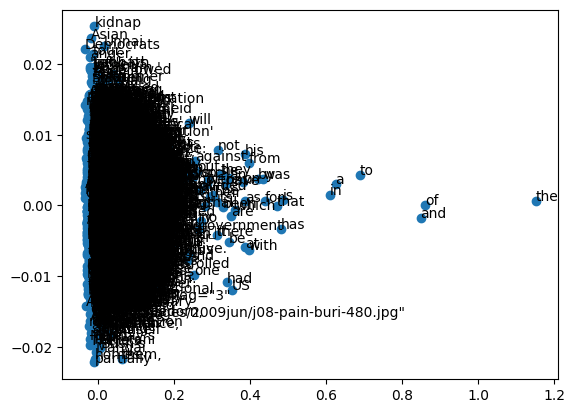

In [13]:
model_creation(eng_sent,"engmodel.bin")

In [ ]:
model_creation(tam_sent,"tammodel.bin")

Word2Vec<vocab=4407, vector_size=100, alpha=0.025>
